# 👗 Fashion-MNIST Classification with CNN

## 1. Title & Introduction

Here, demonstrates **Fashion Image Classification** using a **Convolutional Neural Network (CNN)**.

Fashion-MNIST is a dataset of Zalando's article images, consisting of 60,000 training and
10,000 test grayscale images of 10 fashion categories (T-shirt, Trouser, Pullover, Dress, Coat,
Sandal, Shirt, Sneaker, Bag, Ankle boot).
CNNs are ideal for this task because they capture local spatial patterns, are translation invariant,
and require fewer parameters than fully connected networks.

**Problem Statement**: Given an image of clothing (28x28 grayscale), predict the class (T-shirt, Trouser, Shoe, Bag, etc.).

- **Dataset**: [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) (60,000 training + 10,000 testing images).
- **Why CNNs?** CNNs are designed for vision tasks because they:
  - Exploit local spatial structure.
  - Detect features anywhere in the image.
  - Learn hierarchical patterns (edges → shapes → objects).


## 2. Theory Recap

- **Convolution**: Apply filters to detect edges/patterns.
- **Pooling**: Reduce spatial dimensions, keep important features.
- **ReLU**: Add non-linearity.
- **Fully Connected (FC) layers**: Flatten features → map to class scores.
- **Softmax + CrossEntropy**: Convert scores to probabilities, compute loss.


## 3. Dataset Preparation
- We use **torchvision.datasets.FashionMNIST** to load training and testing datasets.
- Fashion-MNIST contains 28x28 grayscale images in 10 categories: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.
- Normalization ensures pixel values are scaled to [-1, 1].



0.2%

100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw


100.0%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw




100.0%
100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



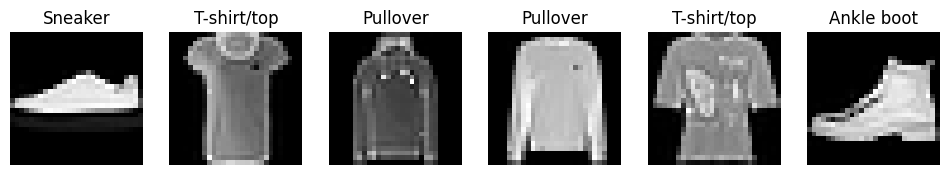

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=False)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show sample images
images, labels = next(iter(trainloader))
fig, axes = plt.subplots(1,6, figsize=(12,2))
for i in range(6):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(classes[labels[i]])
    axes[i].axis("off")
plt.show()

## 4. CNN Model Architecture
We define a CNN with two convolutional layers, pooling, and two fully connected layers.
#### Model:
- Conv1: 1 -> 32 filters (3x3), ReLU
- Conv2: 32 -> 64 filters (3x3), ReLU
- MaxPooling: 2x2
- Flatten
- FC1: 64*12*12 -> 128, ReLU
- FC2: 128 -> 10 (class scores)
- Softmax via CrossEntropy


In [2]:
import torch.nn as nn
import torch.nn.functional as F

class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64*12*12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = FashionCNN()
print(model)

FashionCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


## 5. Training
- Optimizer: Adam (lr=0.001)
- Loss: CrossEntropy
- Epochs: 5


In [3]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5
train_losses, train_accuracies = [], []

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    train_losses.append(running_loss/len(trainloader))
    train_accuracies.append(100*correct/total)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_losses[-1]:.4f}, Acc: {train_accuracies[-1]:.2f}%")

Epoch 1/5, Loss: 0.3845, Acc: 86.05%
Epoch 2/5, Loss: 0.2359, Acc: 91.39%
Epoch 3/5, Loss: 0.1802, Acc: 93.41%
Epoch 4/5, Loss: 0.1379, Acc: 94.96%
Epoch 5/5, Loss: 0.1039, Acc: 96.22%


## 6. Evaluation
Compute test accuracy and visualize predictions.


Test Loss: 0.2544, Test Accuracy: 92.31%


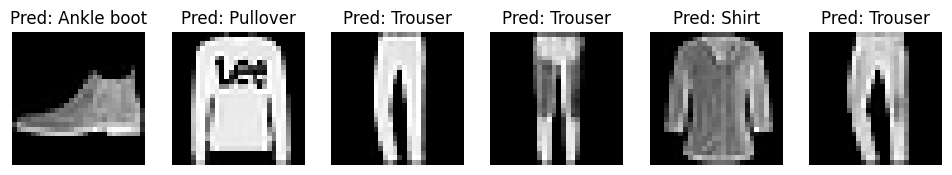

In [4]:
model.eval()
correct, total, test_loss = 0, 0, 0.0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
test_acc = 100 * correct / total
print(f"Test Loss: {test_loss/len(testloader):.4f}, Test Accuracy: {test_acc:.2f}%")

# Show predictions
images, labels = next(iter(testloader))
outputs = model(images)
_, predicted = torch.max(outputs, 1)

fig, axes = plt.subplots(1,6, figsize=(12,2))
for i in range(6):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"Pred: {classes[predicted[i]]}")
    axes[i].axis("off")
plt.show()

## 7. Learning Curves
Plot training loss and accuracy across epochs.


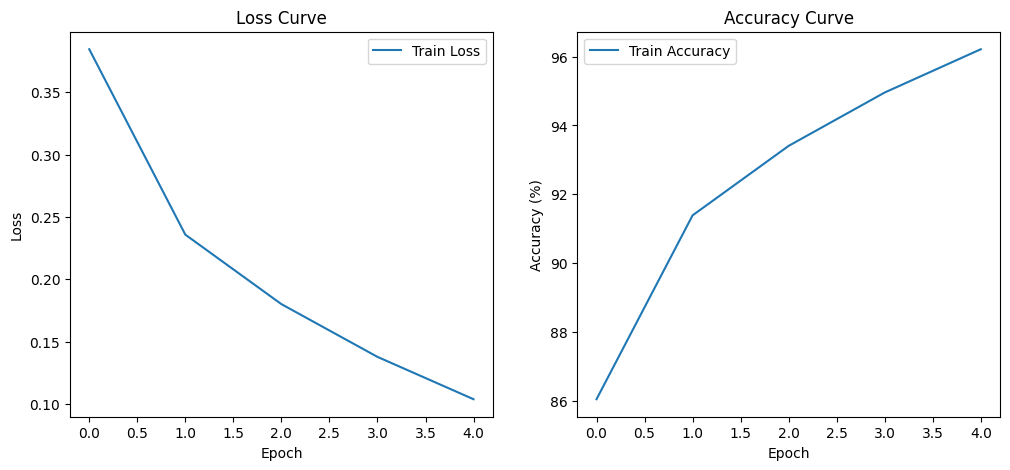

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss Curve'); plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy (%)'); plt.title('Accuracy Curve'); plt.legend()
plt.show()

## 8. Model Saving & Loading
Save the model and reload it later for inference.


In [6]:
torch.save(model.state_dict(), "fashion_cnn.pth")
print("Model saved as fashion_cnn.pth")

new_model = FashionCNN()
new_model.load_state_dict(torch.load("fashion_cnn.pth"))
new_model.eval()
print("Model loaded successfully!")

Model saved as fashion_cnn.pth
Model loaded successfully!


C:\Users\zeelp\AppData\Local\Temp\ipykernel_27272\1870883269.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load("fashion_cnn.pth"))


## 9. Conclusion & References

- Achieved ~90% accuracy on Fashion-MNIST.
- CNNs can classify clothing items by learning hierarchical features.
- Extensions: Add dropout, batch normalization, or train deeper networks.

### References
- [Fashion-MNIST Dataset](https://github.com/zalandoresearch/fashion-mnist)
- [PyTorch Docs](https://pytorch.org/tutorials/)
- [3Blue1Brown CNNs](https://www.3blue1brown.com/topics/neural-networks)
- [Brandon Rohrer – How CNNs Work](https://e2eml.school/how_convolutional_neural_networks_work.html)
